In [1]:
import sympy as sym

In [2]:
# I0 = sym.Symbol('I0')
# I1 = sym.Symbol('I1')
# I2 = sym.Symbol('I2')
# I3 = sym.Symbol('I3')
# Z0 = sym.Symbol('Z0')
# Z1 = sym.Symbol('Z1')
# Z2 = sym.Symbol('Z2')
# Z3 = sym.Symbol('Z3')
Z = []
I = []

for i in range(10):
    I.append(sym.Symbol("I"+str(i)))
    Z.append(sym.Symbol("Z"+str(i)))

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [4]:
import networkx as nx

def graph(we):
    G = nx.Graph()
    G.add_nodes_from([0, 1, 2, 3])
    G.add_weighted_edges_from([(0, 1,we), (1, 2,we), (2, 3,we), (3, 0,we)])
#     n = 4

#     G = nx.random_regular_graph(2,n
# #                                 ,seed=1
#                                )

#     nx.draw(G)
#     show()
#     # nx.draw(G, with_labels=True, alpha=0.8, node_size=500)
#     for (u, v) in G.edges():
#         G.edges[u,v]['weight'] = random.randint(1,10)
    e = [(u, v) for (u, v, d) in G.edges(data=True)]

    pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=700)

    # edges
    nx.draw_networkx_edges(G, pos, edgelist=e, width=6)
    # nx.draw_networkx_edges(
    #     G, pos, edgelist=e, width=6, alpha=0.5, edge_color="b", style="dashed"
    # )

    # node labels
    nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
    # edge weight labels
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels)
    return G

In [5]:
# print(G.edges(data=True))

In [6]:
def Hamil(G):    
    C = []
    eigen_val = []
    H = 0
    N = 2**G.number_of_nodes()
    bin_st = "0"
    bin_st += str(G.number_of_nodes())
    bin_st += "b"
    for i in range(N):
      k = 0
      f = 1
      stri = format(i, bin_st)
      for u,v,w in G.edges(data=True):
        if stri[u]!=stri[v]:
          k -= w['weight']
#       k = -k
      for j in range(G.number_of_nodes()):
        if stri[j]=='1':
          f *= (I[j]-Z[j])
        else:
          f *= (I[j]+Z[j])
      f *= k*(1/N)
      H += f
      C.append(k)
    for i in range(N):
      stri = format(i, bin_st)
      exp = H.subs(I[G.number_of_nodes()-1],1)
      for j in range(G.number_of_nodes()-1):
        exp = exp.subs(I[j],1)
      for j in range(G.number_of_nodes()):
        if stri[j] == '1':
            exp = exp.subs(Z[j],-1)
        else:
            exp = exp.subs(Z[j],1)
      eigen_val.append(exp)
    
    print("C = ",C)
    print("eigen_val = ",eigen_val)
    print("H = ",sym.expand(H))
    eigen_state = []
    mini_e = min(eigen_val)
    ind = 0
    for i in eigen_val:
        if i == mini_e:
            eigen_state.append(format(ind, bin_st))
        ind += 1
    print(eigen_state)
    return C,H,eigen_val,eigen_state

In [7]:
# !pip install qiskit

In [8]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import Aer, execute
from qiskit.circuit import Parameter

# Adjacency is essentially a matrix which tells you which nodes are
# connected. This matrix is given as a sparse matrix, so we need to
# convert it to a dense matrix
# adjacency = nx.adjacency_matrix(G).todense()

# nqubits = 4

# beta = Parameter("$\\beta$")
# qc_mix = QuantumCircuit(nqubits)
# for i in range(0, nqubits):
#     qc_mix.rx(2 * beta, i)
    
# qc_mix.draw()

In [9]:
# gamma = Parameter("$\\gamma$")
# qc_p = QuantumCircuit(nqubits)
# for pair in list(G.edges()):  # pairs of nodes
#     qc_p.rzz(2 * gamma, pair[0], pair[1])
#     qc_p.barrier()
    
# qc_p.decompose().draw()

In [10]:
# qc_0 = QuantumCircuit(nqubits)
# for i in range(0, nqubits):
#     qc_0.h(i)
    
# qc_0.draw()

In [11]:
# qc_qaoa = QuantumCircuit(nqubits)

# qc_qaoa.append(qc_0, [i for i in range(0, nqubits)])
# qc_qaoa.append(qc_p, [i for i in range(0, nqubits)])
# qc_qaoa.append(qc_mix, [i for i in range(0, nqubits)])

# qc_qaoa.decompose().decompose().draw()

In [12]:
from qiskit import IBMQ 
from qiskit import ClassicalRegister, QuantumCircuit, Aer, execute, transpile

In [13]:
# IBMQ.save_account("d9cd4db7c9f62399a00b9cf4d38c25a7cf697b6e81196d6cc9b9da7aaaf64a9cdaeff9ee2119111e4ee3ae5ca6cda330dfbc1c11c2678d2b28f2bbbfd88c30ef")
# IBMQ.load_account() # Load account from disk
# provider = IBMQ.get_provider()
# print(provider)

In [14]:
# print(provider.backends())

In [15]:
# back = provider.get_backend('ibmq_qasm_simulator')
back = Aer.get_backend('aer_simulator')

In [16]:
def call_back(x, f, a):
    if a==True:
        print(f," ",a)

In [17]:
def maxcut_obj(x, G):
    """
    Given a bitstring as a solution, this function returns
    the number of edges shared between the two partitions
    of the graph.
    
    Args:
        x: str
           solution bitstring
           
        G: networkx graph
        
    Returns:
        obj: float
             Objective
    """
    obj = 0
    for i, j, w in G.edges(data=True):
        if x[i] != x[j]:
            obj -= w['weight']
            
    return obj


def compute_expectation(counts, G):
    
    """
    Computes expectation value based on measurement results
    
    Args:
        counts: dict
                key as bitstring, val as count
           
        G: networkx graph
        
    Returns:
        avg: float
             expectation value
    """
    
    avg = 0
    sum_count = 0
    for bitstring, count in counts.items():
        
        obj = maxcut_obj(bitstring[::-1], G)
        avg += obj * count
        sum_count += count
#     print("cost : ",avg/sum_count)    
    return avg/sum_count


# We will also bring the different circuit components that
# build the qaoa circuit under a single function
def create_qaoa_circ(G,H, theta):
    
    """
    Creates a parametrized qaoa circuit
    
    Args:  
        G: networkx graph
        theta: list
               unitary parameters
                     
    Returns:
        qc: qiskit circuit
    """
    
    nqubits = len(G.nodes())
    p = len(theta)//2  # number of alternating unitaries
#     p = p_layer
    qc = QuantumCircuit(nqubits)
    
    beta = theta[:p]
    gamma = theta[p:]
    
    # initial_state
    for i in range(0, nqubits):
        qc.h(i)
    
    for irep in range(0, p):
        
        # problem unitary
#         exp2 = 0
#         exp1 = -1
        for u,v,k in G.edges(data=True):
#             exp1 = H.subs(I[nqubits-1],1)
#             exp1 = exp1.subs(Z[nqubits-1],0)
#             for l in range(nqubits-1):
#                 exp1 = exp1.subs(I[l],1)
#                 exp1 = exp1.subs(Z[l],0)
#             exp2 = H.subs(I[nqubits-1],1)
#             for l in range(nqubits):
#                 exp2 = exp2.subs(I[l],1)
#                 if l in pair:
#                     exp2 = exp2.subs(Z[l],1)
#                 else:
#                     exp2 = exp2.subs(Z[l],0)
# #             print(pair," ",exp2-exp1)
            qc.cx(u,v)
            qc.rz(2 * gamma[irep]*k["weight"], v)
            qc.cx(u,v)
#             qc.rzz(2 * gamma[irep]*k["weight"], u, v)

        # mixer unitary
        for i in range(0, nqubits):
            qc.rx(2 * beta[irep], i)
            
    qc.measure_all()
        
    return qc

# Finally we write a function that executes the circuit on the chosen backend
def get_expectation(G,H, shots=512):
    
    """
    Runs parametrized circuit
    
    Args:
        G: networkx graph
        p: int,
           Number of repetitions of unitaries
    """
    
    backend = back
    backend.shots = shots
    
    def execute_circ(theta):
        
        qc = create_qaoa_circ(G,H, theta)
        counts = backend.run(qc,nshots=512).result().get_counts()
        
        return compute_expectation(counts, G)
    
    return execute_circ

In [18]:
from scipy.optimize import minimize, basinhopping
import numpy as np

In [19]:
from qiskit.visualization import plot_histogram

In [20]:
import math

In [21]:
w = [10**(i) for i in range(3)]
ans = []
p_layer = 0

In [22]:
dict_op = {}
G_rand = {}


In [23]:
fp = open("result_max_cut_w_1.txt","w")

In [24]:
def find_p(we):
    sc = 100
    p_layer = 1
    G = graph(we)
    G_rand[we] = G
    C,H,e_val,e_s = Hamil(G)
    while(sc>25):
        initial_theta = np.ones(2*p_layer)

        expectation = get_expectation(G,H)
#         minimizer_kwargs = {"method": "COBYLA"}
#         res = basinhopping(expectation, initial_theta, minimizer_kwargs=minimizer_kwargs,
#                             niter=500)

        res = minimize(expectation, 
                              initial_theta, 
                              method='SLSQP')
#         res

        backend = back
        backend.shots = 512

        qc_res = create_qaoa_circ(G,H, res.x)

        counts = backend.run(qc_res).result().get_counts()

        display(plot_histogram(counts))
        
        total_count = 0
        for i in counts:
          total_count += counts[i]
        #compute score
        score = 0
        for i in counts:
          if i not in e_s:
            score += counts[i]
#           else:
#             score += (counts[i]/total_count-0)**2
        score = score/total_count*100
        fp.write(f"graph {we}\nlayer {p_layer}\nError in results(in per) = {score}\n")
        print("graph ",we,"\n","layer ",p_layer,"\n","Error in results(in per) = ",score,"\n")
        p_layer+=1
        sc = score
    e_val = set(e_val)
    e_val = list(e_val)
    dict_op[we] = [e_val[0]-e_val[1], p_layer-1,sc]
    return p_layer-1
    

In [25]:
print(ans)

[]


C = C =  [0, -2, -2, -2, -2, -4, -2, -2, -2, -2, -4, -2, -2, -2, -2, 0]
eigen_val =  [0, -2.00000000000000, -2.00000000000000, -2.00000000000000, -2.00000000000000, -4.00000000000000, -2.00000000000000, -2.00000000000000, -2.00000000000000, -2.00000000000000, -4.00000000000000, -2.00000000000000, -2.00000000000000, -2.00000000000000, -2.00000000000000, 0]
 [0, -200, -200, -200, -200, -400, -200, -200, -200, -200, -400, -200, -200, -200, -200, 0]
eigen_val =  [0, -200.000000000000, -200.000000000000, -200.000000000000, -200.000000000000, -400.000000000000, -200.000000000000, -200.000000000000, -200.000000000000, -200.000000000000, -400.000000000000, -200.000000000000, -200.000000000000, -200.000000000000, -200.000000000000, 0]
C =  [0, -20, -20, -20, -20, -40, -20, -20, -20, -20, -40, -20, -20, -20, -20, 0]
eigen_val =  [0, -20.0000000000000, -20.0000000000000, -20.0000000000000, -20.0000000000000, -40.0000000000000, -20.0000000000000, -20.0000000000000, -20.0000000000000, -20.000000000

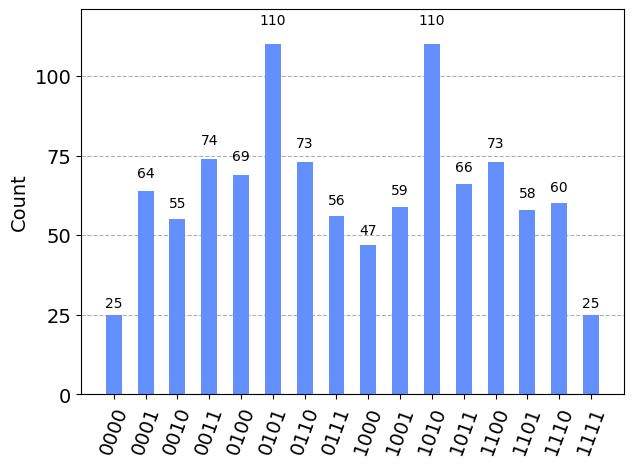

graph  1 
 layer  1 
 Error in results(in per) =  78.515625 



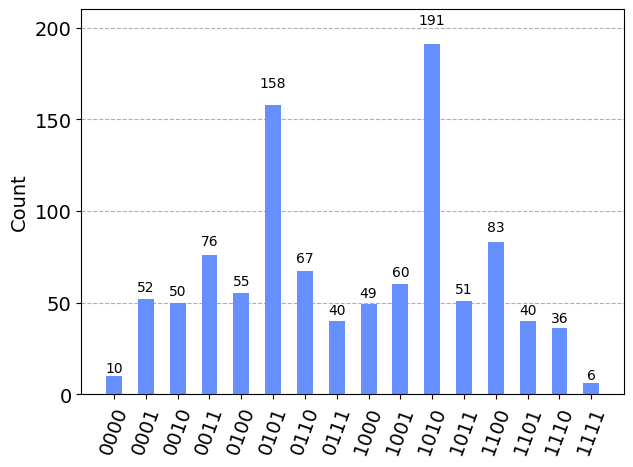

graph  10 
 layer  1 
 Error in results(in per) =  65.91796875 



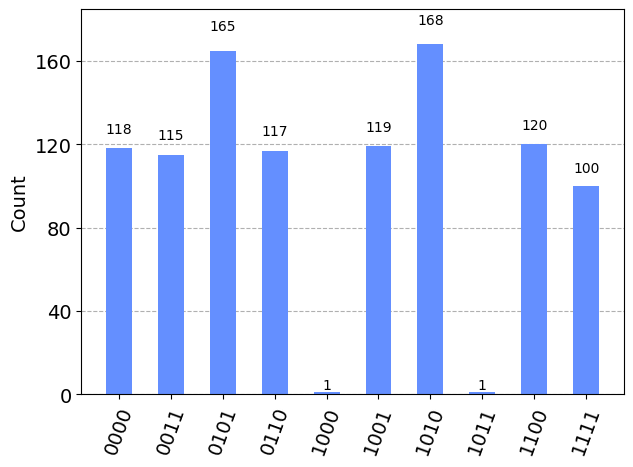

graph  100 
 layer  1 
 Error in results(in per) =  67.48046875 



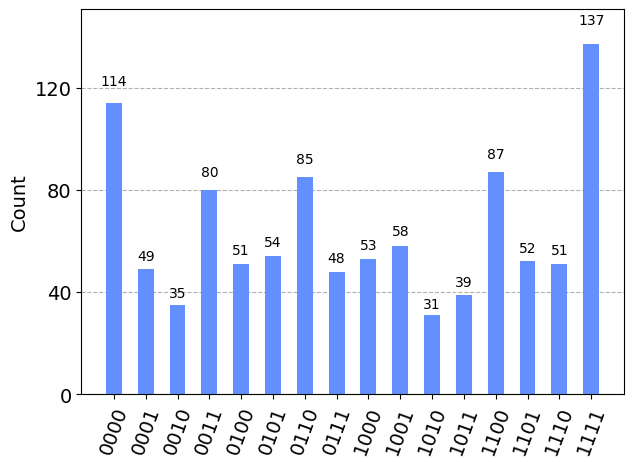

graph  1 
 layer  2 
 Error in results(in per) =  91.69921875 



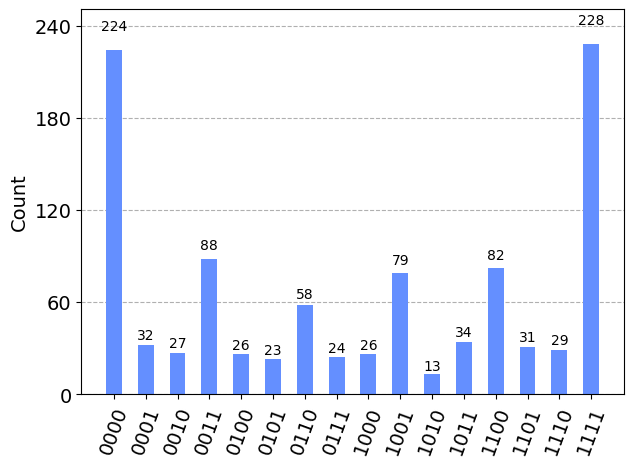

graph  100 
 layer  2 
 Error in results(in per) =  96.484375 



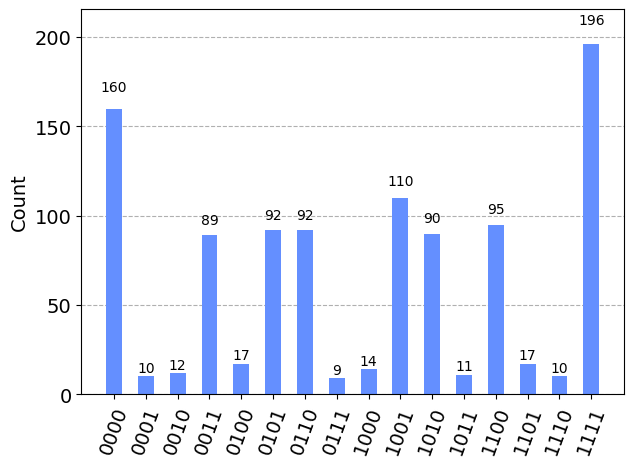

graph  10 
 layer  2 
 Error in results(in per) =  82.2265625 



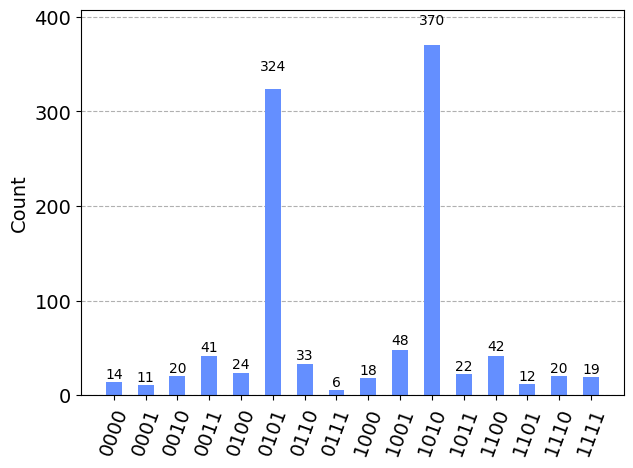

graph  100 
 layer  3 
 Error in results(in per) =  32.2265625 



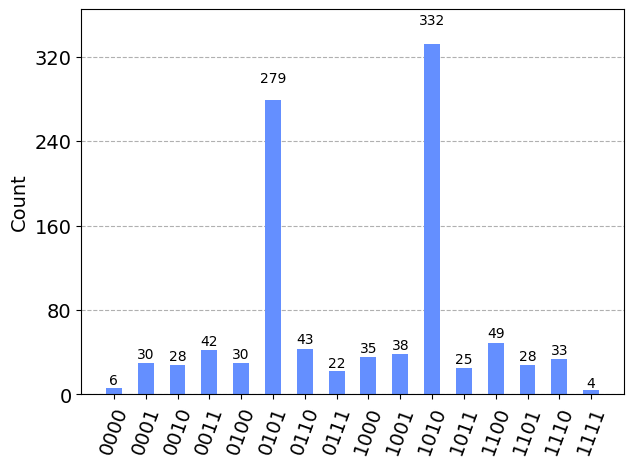

graph  10 
 layer  3 
 Error in results(in per) =  40.33203125 



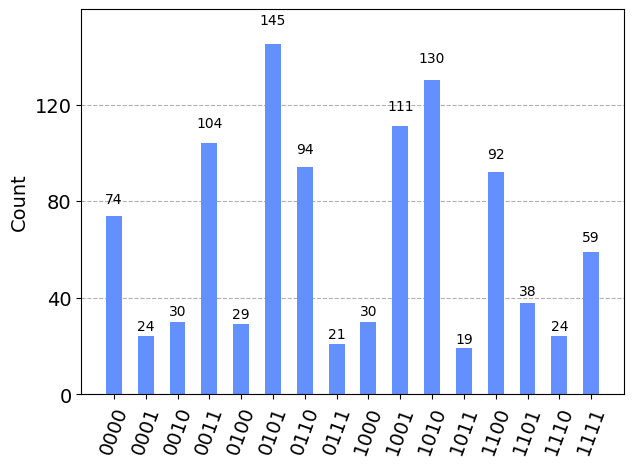

graph  1 
 layer  3 
 Error in results(in per) =  73.14453125 



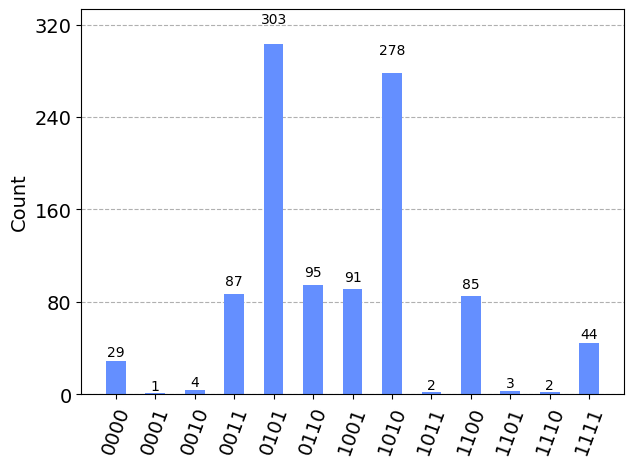

graph  100 
 layer  4 
 Error in results(in per) =  43.26171875 



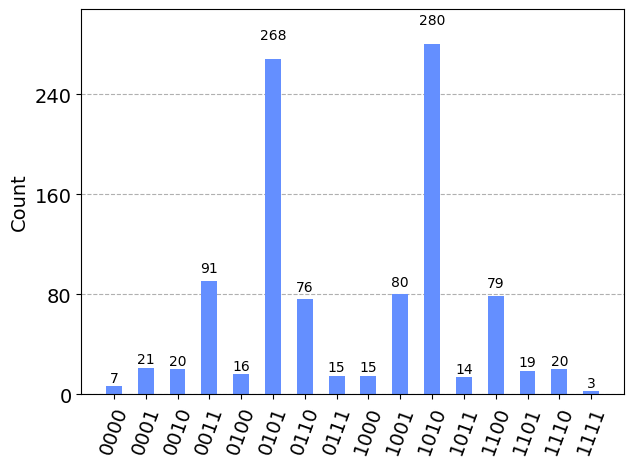

graph  1 
 layer  4 
 Error in results(in per) =  46.484375 



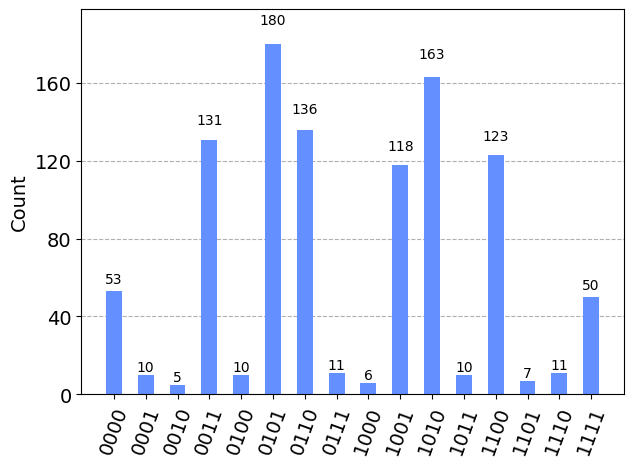

graph  10 
 layer  4 
 Error in results(in per) =  66.50390625 



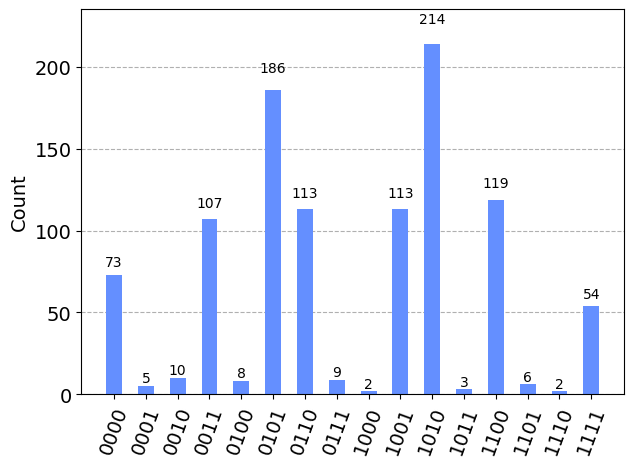

graph  10 
 layer  5 
 Error in results(in per) =  60.9375 



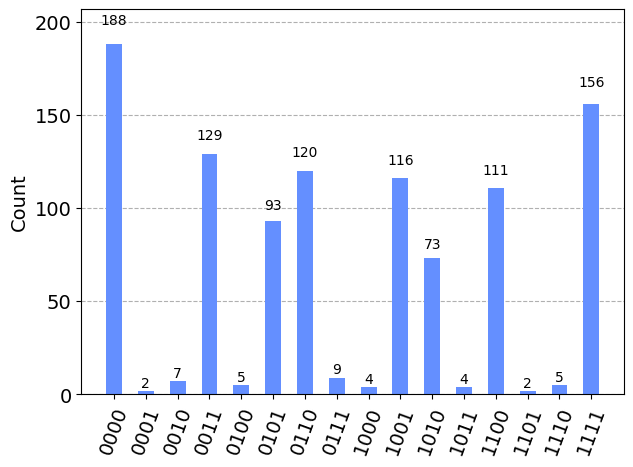

graph  1 
 layer  5 
 Error in results(in per) =  83.7890625 



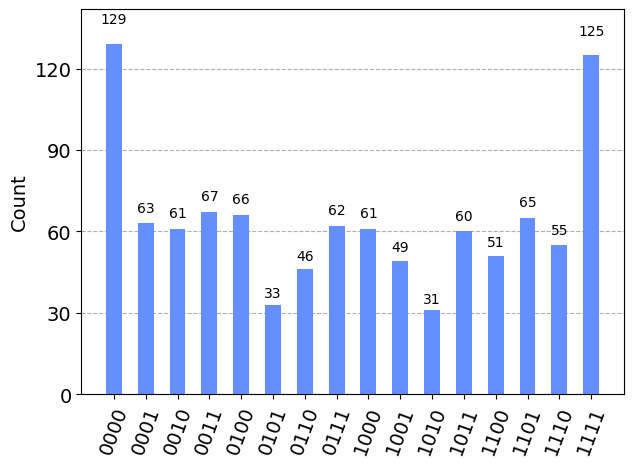

graph  100 
 layer  5 
 Error in results(in per) =  93.75 



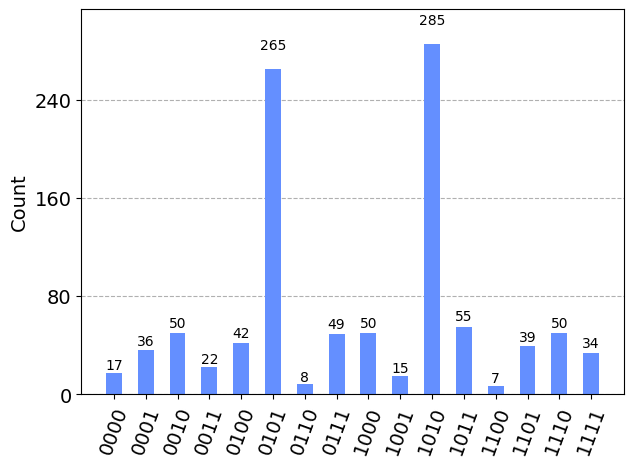

graph  100 
 layer  6 
 Error in results(in per) =  46.2890625 



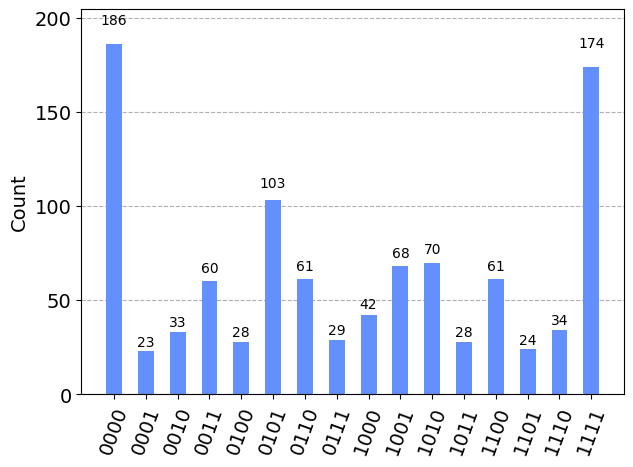

graph  10 
 layer  6 
 Error in results(in per) =  83.10546875 



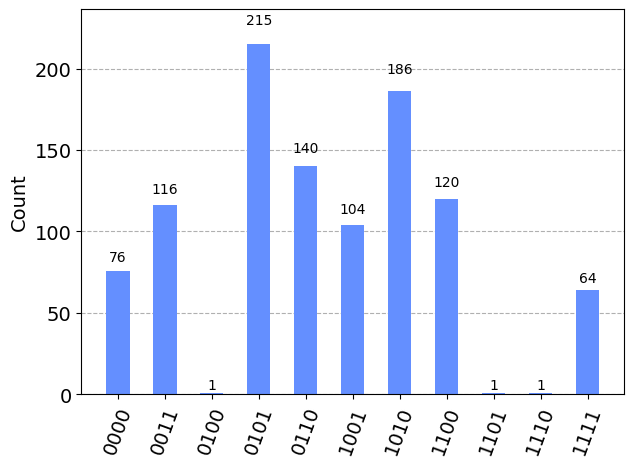

graph  1 
 layer  6 
 Error in results(in per) =  60.83984375 



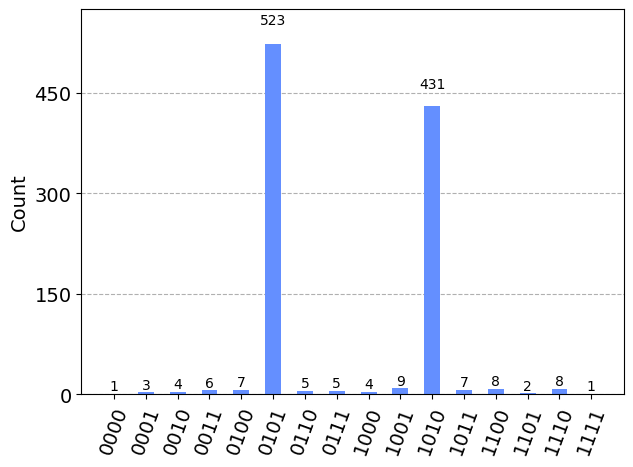

graph  100 
 layer  7 
 Error in results(in per) =  6.8359375 



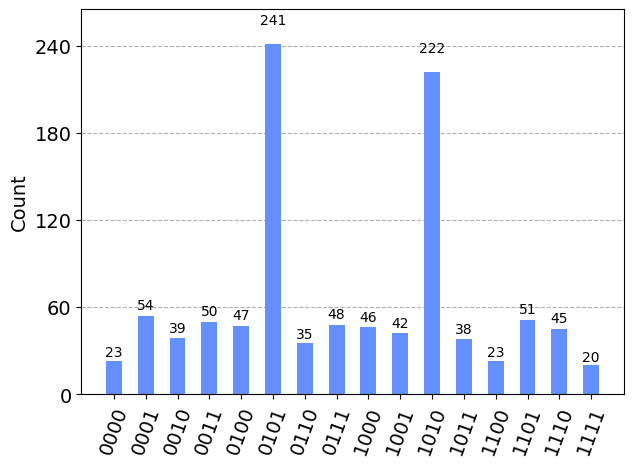

graph  10 
 layer  7 
 Error in results(in per) =  54.78515625 



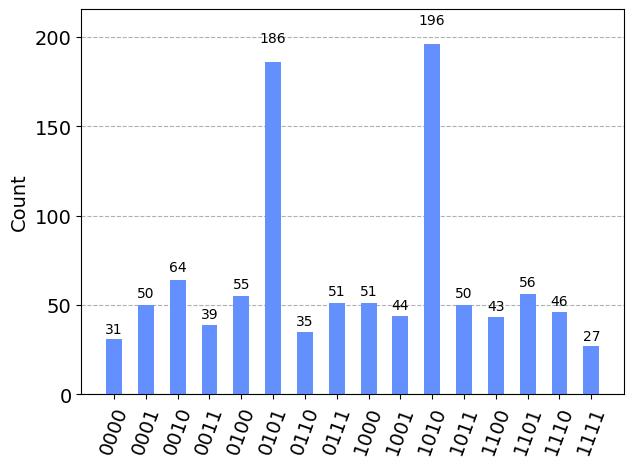

graph  1 
 layer  7 
 Error in results(in per) =  62.6953125 



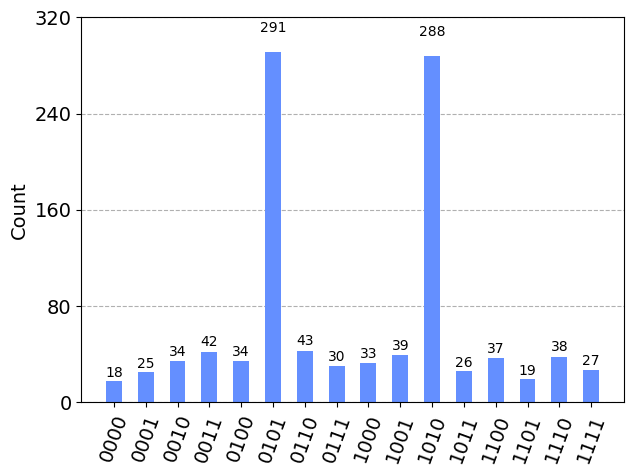

graph  1 
 layer  8 
 Error in results(in per) =  43.45703125 



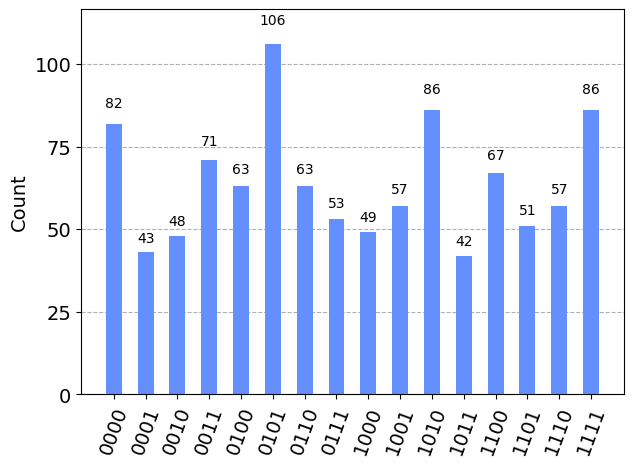

graph  10 
 layer  8 
 Error in results(in per) =  81.25 



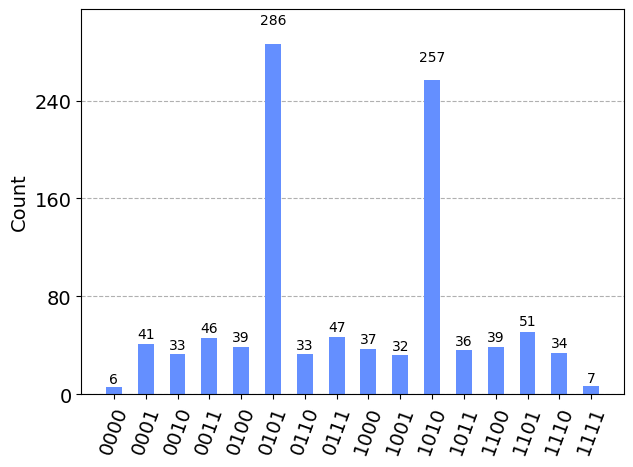

graph  1 
 layer  9 
 Error in results(in per) =  46.97265625 



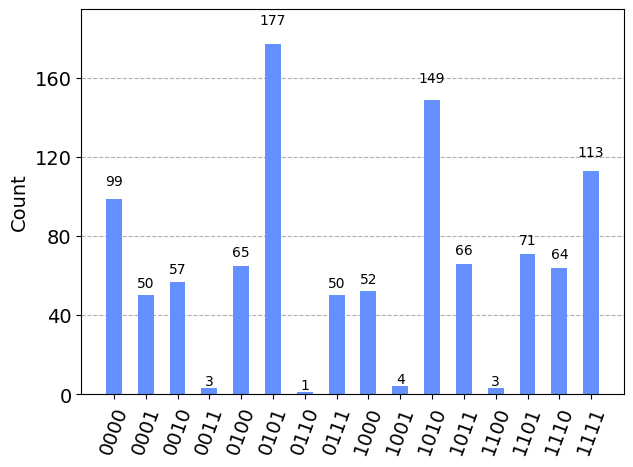

graph  10 
 layer  9 
 Error in results(in per) =  68.1640625 



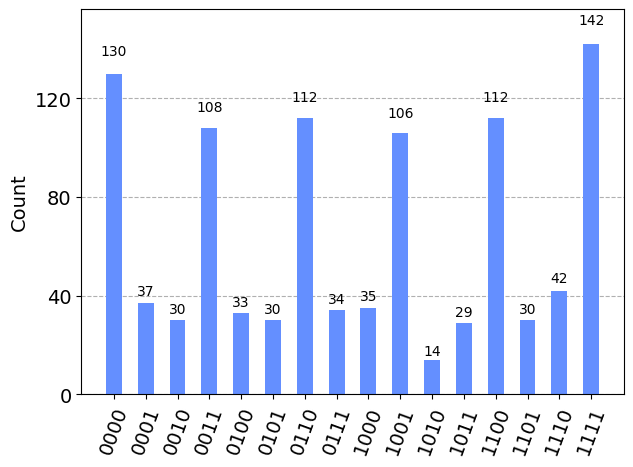

graph  1 
 layer  10 
 Error in results(in per) =  95.703125 



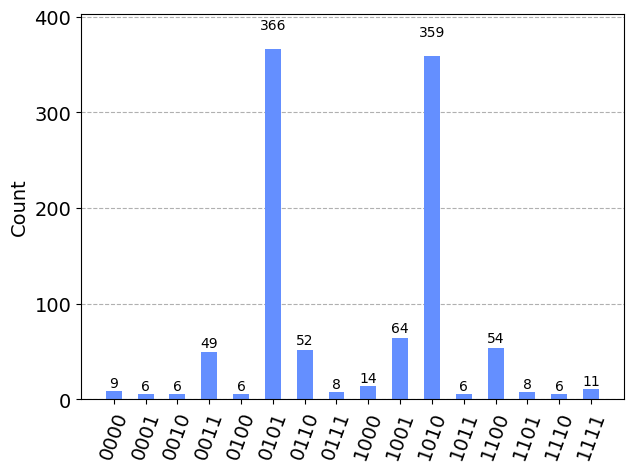

graph  10 
 layer  10 
 Error in results(in per) =  29.19921875 



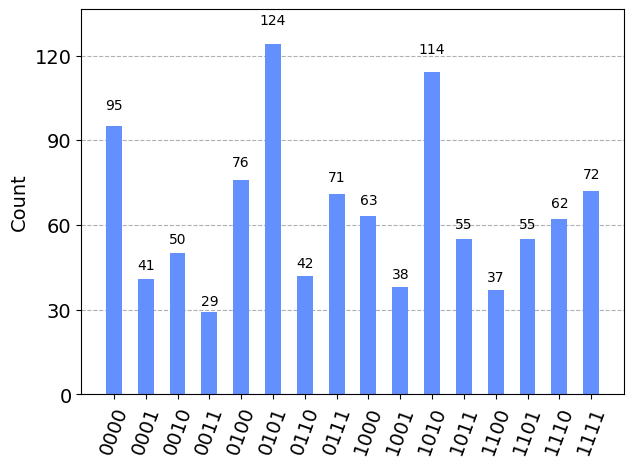

graph  1 
 layer  11 
 Error in results(in per) =  76.7578125 



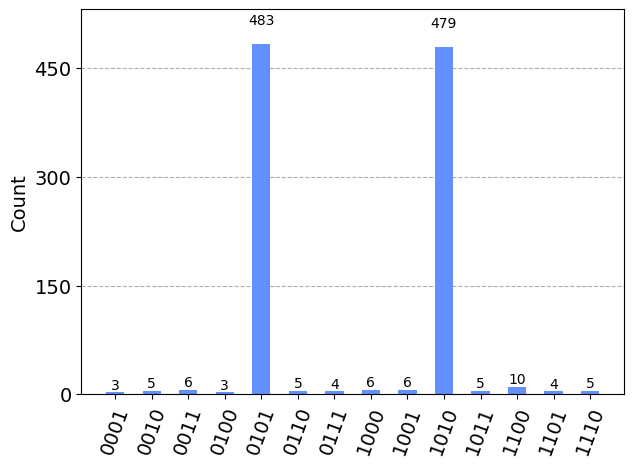

graph  10 
 layer  11 
 Error in results(in per) =  6.0546875 



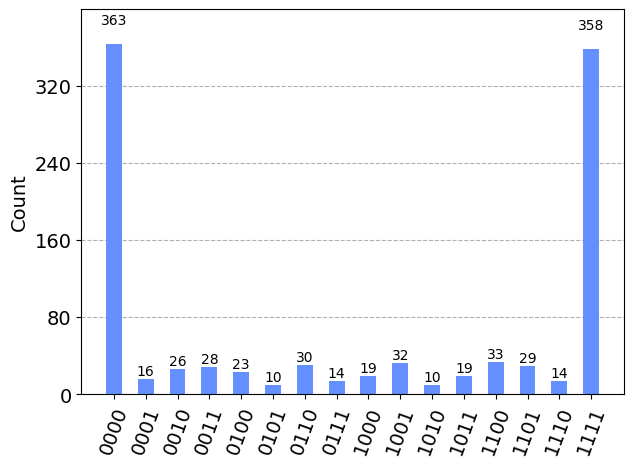

graph  1 
 layer  12 
 Error in results(in per) =  98.046875 



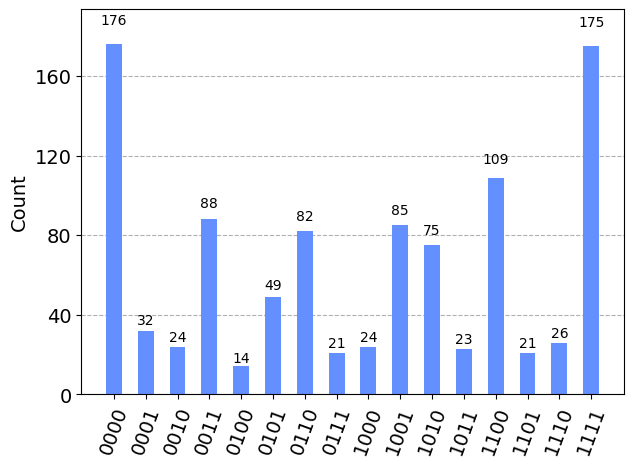

graph  1 
 layer  13 
 Error in results(in per) =  87.890625 



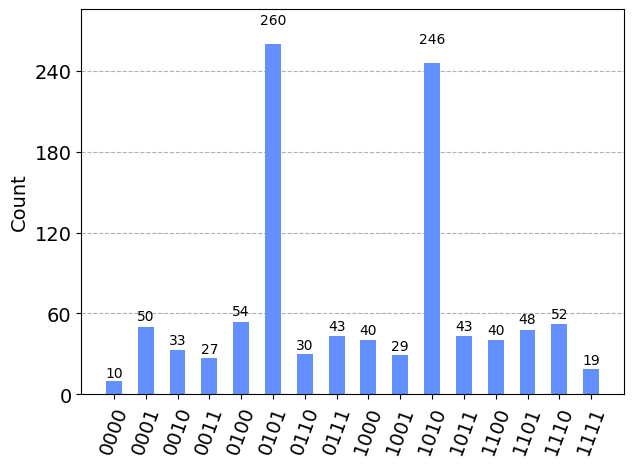

graph  1 
 layer  14 
 Error in results(in per) =  50.5859375 



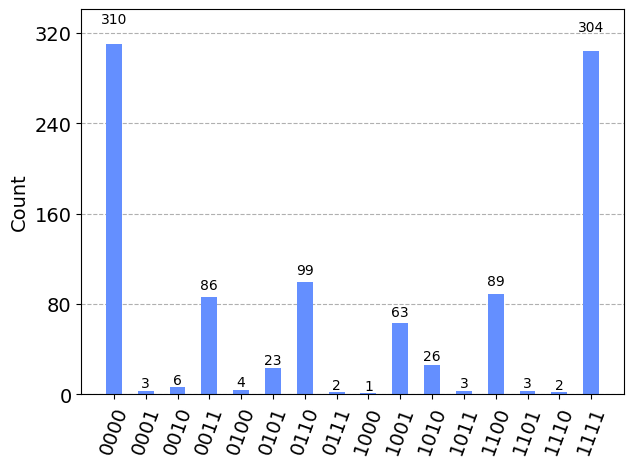

graph  1 
 layer  15 
 Error in results(in per) =  95.21484375 



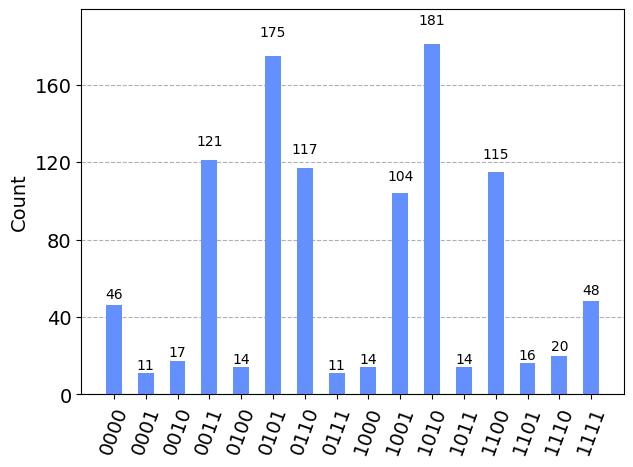

graph  1 
 layer  16 
 Error in results(in per) =  65.234375 



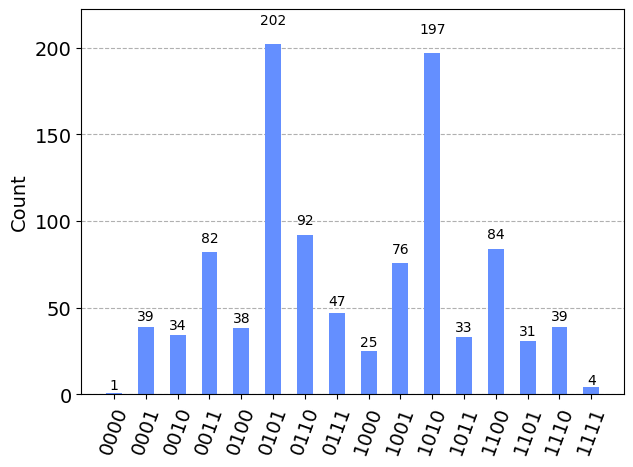

graph  1 
 layer  17 
 Error in results(in per) =  61.03515625 



In [ ]:
import threading

t = []

for i in range(len(w)):
    t.append(threading.Thread(target=find_p, args=(w[i],)))
# t2 = threading.Thread(target=find_p, args=(w[1],))
# t3 = threading.Thread(target=find_p, args=(w[2],))
# t4 = threading.Thread(target=find_p, args=(w[3],))
# t5 = threading.Thread(target=find_p, args=(w[4],))

for i in range(len(w)):
    t[i].start()
# t2.start()
# t3.start()
# t4.start()
# t5.start()
 
for i in range(len(w)):
    t[i].join()
# t2.join()
# t3.join()
# t4.join()
# t5.join()

In [ ]:
print(dict_op)

In [ ]:
fp.close()

In [ ]:
x = []

y = []

for i in range(len(w)):
    x.append(-dict_op[i+1][0])
    y.append(dict_op[i+1][1]*dict_op[i+1][2])
  
# plotting the points 
plt.stem(x, y)
  
# naming the x axis
plt.xlabel('separation between minimum eigen value and next minimum eigen value')
# naming the y axis
plt.ylabel('no. of p layers required*error calculated')
  
# giving a title to my graph
plt.title(' error*p vs speration')
  
# function to show the plot
plt.show()

In [ ]:
x = []

y = []

for i in range(len(w)):
    x.append(-dict_op[i+1][0])
    y.append(dict_op[i+1][1])
  
# plotting the points 
plt.stem(x, y)
  
# naming the x axis
plt.xlabel('separation between minimum eigen value and next minimum eigen value')
# naming the y axis
plt.ylabel('no. of p layers required for erroe less than 1%')
  
# giving a title to my graph
plt.title('p vs speration')
  
# function to show the plot
plt.show()